In [6]:
import pandas as pd
import pickle
import numpy as np
from numpy import sort

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import shuffle, resample

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
import os

import warnings
warnings.filterwarnings('ignore')

In [20]:
%%bigquery df
WITH MAIN AS (
  SELECT
    MOBILE
    ,TARGET_MONTH
    ,SIM_MONTH_AGE
    ,TS
    ,TPV_6M
    ,TPV_LAST_MONTH
    ,TPV_SHIFT
    ,GAP_DAY
    ,COVER_SHIFT
    ,TOTAL_MONTH
    ,PT_FIX_SPEED_UL_COVER_SHIFT
    ,CH_OTHER_FREQ_6M
    ,V_3D_FREQ_SHIFT
    ,PT_BURST_SPEED_COVER_SHIFT
    ,V_3D_FREQ_6M
    ,PT_FIX_SPEED_UL_COVER
    ,CH_OTHER_FREQ_SHIFT
    ,PT_FIX_SPEED_UL_FREQ_SHIFT
    ,PT_FIX_SPEED_NS_COVER_SHIFT
    ,V_7D_FREQ_6M
    ,PT_FIX_SPEED_UL_FREQ_6M
    ,COVER_DAY_6M
    ,V_2D_FREQ_SHIFT
    ,V_CODE_6M
    ,V_2D_FREQ_6M
    ,SOF_WALLET_FREQ_6M
    ,V_CODE_SHIFT
    ,SOF_WALLET_FREQ_SHIFT
    ,PT_BURST_SPEED_COVER
    ,PT_BURST_SPEED_FREQ_SHIFT
    ,V_7D_FREQ_SHIFT
    ,CH_WALLET_FREQ_6M
    ,SOF_AIRTIME_FREQ_6M
    ,V_VALIDITY_6M
    ,RC_FLAG
  FROM `acm-bi.Analysis.SA_VAS_RECURRING_NEW_FEATURE_20210303`
#   LIMIT 5000
)

(
  SELECT *
  FROM MAIN
  WHERE TARGET_MONTH <= '2020-12-01'
)

In [21]:
df.shape

(47476781, 35)

In [22]:
def remove_outlier(df, col_name):
    q3 = df[col_name].quantile(0.75)
    q1 = df[col_name].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    if lower < 0:
        lower = 0
    df = df[(df[col_name] >= lower) & (df[col_name] <= upper)]
    return df

In [23]:
df.shape

(47476781, 35)

In [43]:
df['RC_FLAG'].value_counts()

0    47226002
1      250779
Name: RC_FLAG, dtype: int64

# Box plot

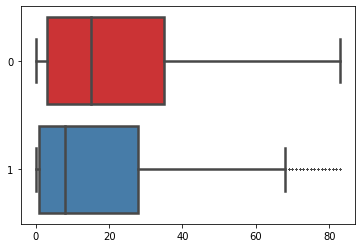

In [24]:
fig, ax = plt.subplots()
sns.boxplot(x='SIM_MONTH_AGE', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'SIM_MONTH_AGE'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

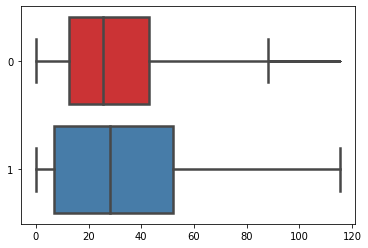

In [25]:
fig, ax = plt.subplots()
sns.boxplot(x='TS', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TS'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

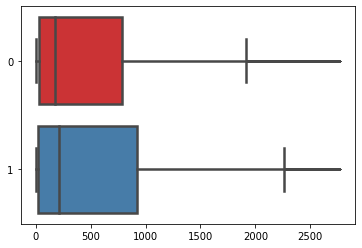

In [26]:
fig, ax = plt.subplots()
sns.boxplot(x='TPV_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TPV_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

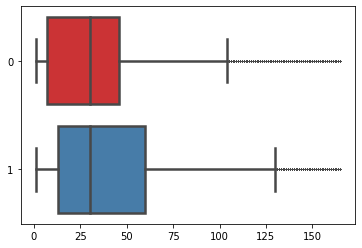

In [27]:
fig, ax = plt.subplots()
sns.boxplot(x='COVER_DAY_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'COVER_DAY_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

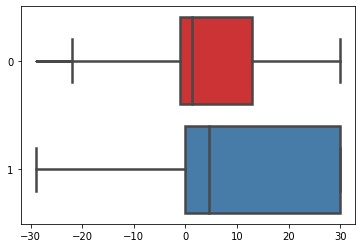

In [28]:
fig, ax = plt.subplots()
sns.boxplot(x='COVER_SHIFT', y='RC_FLAG', hue='RC_FLAG', data=df, palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

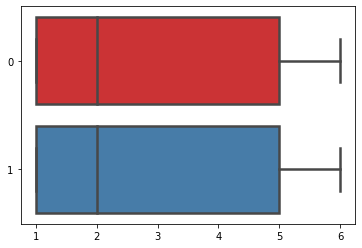

In [29]:
fig, ax = plt.subplots()
sns.boxplot(x='TOTAL_MONTH', y='RC_FLAG', hue='RC_FLAG', data=df, palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

# Violin plot

<AxesSubplot:xlabel='RC_FLAG', ylabel='SIM_MONTH_AGE'>

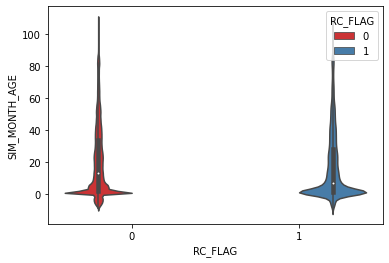

In [38]:
sns.violinplot(x='RC_FLAG', y='SIM_MONTH_AGE',data=df,hue='RC_FLAG',palette='Set1')

<AxesSubplot:xlabel='RC_FLAG', ylabel='TS'>

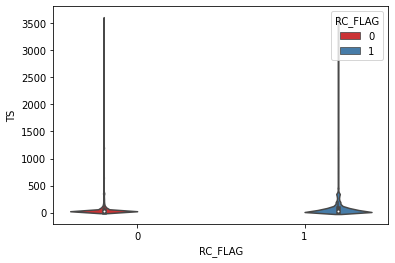

In [39]:
sns.violinplot(x='RC_FLAG', y='TS',data=df,hue='RC_FLAG',palette='Set1')

In [40]:
sns.violinplot(x='RC_FLAG', y='TPV_6M',data=df,hue='RC_FLAG',palette='Set1')

<AxesSubplot:xlabel='RC_FLAG', ylabel='TPV_6M'>

<AxesSubplot:xlabel='RC_FLAG', ylabel='COVER_DAY_6M'>

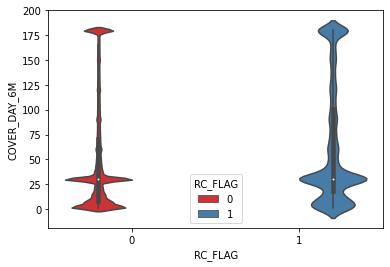

In [41]:
sns.violinplot(x='RC_FLAG', y='COVER_DAY_6M',data=df,hue='RC_FLAG',palette='Set1')

In [42]:
sns.violinplot(x='RC_FLAG', y='COVER_SHIFT',data=df,hue='RC_FLAG',palette='Set1')

<AxesSubplot:xlabel='RC_FLAG', ylabel='COVER_SHIFT'>